# Lending Club Case Study

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

**Problem Statement**

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### 1 - Introduction to Data understanding

In [152]:
# Importing all libraries required.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [153]:
# Read CSV file.
df=pd.read_csv('loan.csv')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [154]:
# Reading CSV file with dtype object.
df.shape
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [155]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### 2 -  Data cleaning 
 cleaning missing values, removing redundant columns etc.

In [156]:
id=df[df.duplicated(['id'])]
id
# There are no duplicate rows in loan dataset

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

In [157]:
#Number of empty Rows:
df.isnull().all(axis=1).sum()

0

In [158]:
#Number of empty Columns:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [159]:
#adding only required columns
df=df[['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'grade', 'sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','zip_code','addr_state','dti','acc_now_delinq','chargeoff_within_12_mths']]
df.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   

   loan_status         purpose zip_code addr_state    dti  acc_now_delinq  \
0   Fully Paid     credit_card    860xx         AZ  27.65               0   
1  Charged Off             car    309xx         GA   1.00               0   
2   Fully Paid  small_business    606xx         IL   8.72               0   

   chargeoff_within_12_mths  
0                       0.0  
1                       0.0  
2                       0.0

In [160]:
# Observations
df.shape

(39717, 19)

In [161]:
#Number of empty Columns:
df.isnull().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
acc_now_delinq                 0
chargeoff_within_12_mths      56
dtype: int64

In [162]:
df[df['emp_length'].isnull()].head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
168  1067644       2500         2500           2500.0   36 months    7.51%   
323  1058717      18000        18000          18000.0   60 months   17.58%   
394  1064582       4000         4000           4000.0   36 months   11.71%   

    grade sub_grade emp_length home_ownership  annual_inc verification_status  \
168     A        A3        NaN            OWN     12000.0     Source Verified   
323     D        D4        NaN       MORTGAGE     60000.0            Verified   
394     B        B3        NaN           RENT     24000.0     Source Verified   

     loan_status             purpose zip_code addr_state    dti  \
168  Charged Off  debt_consolidation    961xx         CA  16.30   
323   Fully Paid  debt_consolidation    363xx         AL  21.96   
394   Fully Paid    home_improvement    328xx         FL   7.50   

     acc_now_delinq  chargeoff_within_12_mths  
168               0                       0.0  
323               0                       0.0  
394               0                       0.0

In [163]:
#formating term,emp_length and int_rate column to have only numbers
df['term']=df['term'].str.extract(r'(\d+)').astype(int)
df['emp_length']=df['emp_length'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
df['int_rate']=df['int_rate'].str.rstrip('%').astype(float)

In [164]:
#Number of empty Columns:
df.isnull().sum()

id                           0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
acc_now_delinq               0
chargeoff_within_12_mths    56
dtype: int64

In [165]:
# Lets look on verification_status .
df['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [166]:
#Deleting Not verified status.
df=df[~(df['verification_status']=='Not Verified')]

In [167]:
# Observations
df.shape

(22796, 19)

In [168]:
#Number of empty Columns:
df.isnull().sum()

id                          0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
acc_now_delinq              0
chargeoff_within_12_mths    0
dtype: int64

### 3 - Data Analysis

In [169]:
# Lets look on important variable loan status in total loans issued.
df['loan_status'].value_counts()

Fully Paid     18398
Charged Off     3485
Current          913
Name: loan_status, dtype: int64

In [170]:
#The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans, and tag the other two values as 0 or 1 to make analysis simple and clean.
df=df[~(df['loan_status']=='Current')]

In [171]:
df['new_loan_status'] = df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

In [172]:
df.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate grade  \
0  1077501       5000         5000           4975.0    36     10.65     B   
1  1077430       2500         2500           2500.0    60     15.27     C   
3  1076863      10000        10000          10000.0    36     13.49     C   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           1           RENT     30000.0     Source Verified   
3        C1          10           RENT     49200.0     Source Verified   

   loan_status      purpose zip_code addr_state    dti  acc_now_delinq  \
0   Fully Paid  credit_card    860xx         AZ  27.65               0   
1  Charged Off          car    309xx         GA   1.00               0   
3   Fully Paid        other    917xx         CA  20.00               0   

   chargeoff_within_12_mths  new_loan_status  
0                       0.0                1  
1                       0.0                0  
3                       0.0                1

In [173]:
# Observations
df.dtypes

id                            int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                          int64
int_rate                    float64
grade                        object
sub_grade                    object
emp_length                    int64
home_ownership               object
annual_inc                  float64
verification_status          object
loan_status                  object
purpose                      object
zip_code                     object
addr_state                   object
dti                         float64
acc_now_delinq                int64
chargeoff_within_12_mths    float64
new_loan_status               int64
dtype: object

###  Data Analysis: Univariate Analysis

In [174]:
#analysing loan_amount
df['loan_amnt'].describe()

count    21883.000000
mean     13076.327515
std       8131.986163
min       1000.000000
25%       6400.000000
50%      12000.000000
75%      18250.000000
max      35000.000000
Name: loan_amnt, dtype: float64

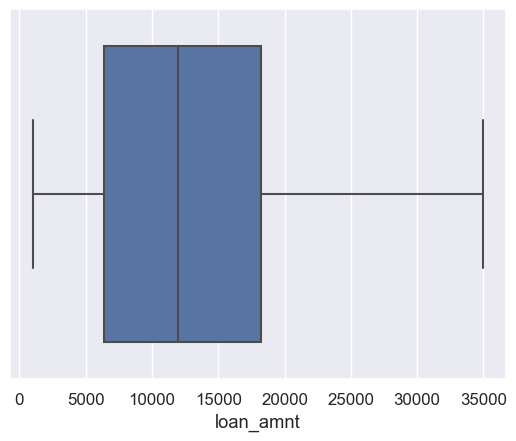

In [175]:
sns.boxplot(df['loan_amnt'])
plt.show()

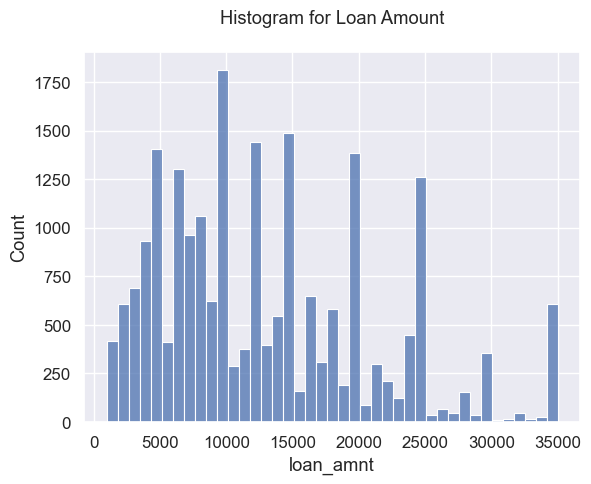

In [176]:
sns.histplot(df['loan_amnt'])
plt.title("Histogram for Loan Amount\n")
plt.show()

In [177]:
#analysing purpose of loan.
df.purpose.value_counts()

debt_consolidation    10833
credit_card            2782
other                  1829
home_improvement       1665
major_purchase         1107
small_business         1101
car                     708
wedding                 551
medical                 377
moving                  337
house                   230
vacation                203
educational              95
renewable_energy         65
Name: purpose, dtype: int64

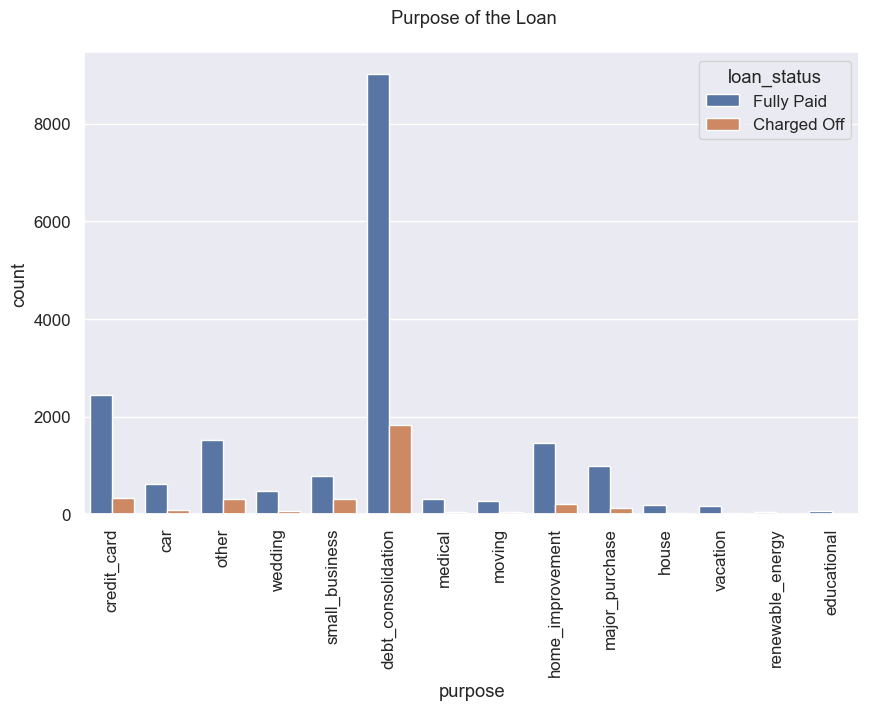

In [178]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.purpose,hue=df['loan_status'])
plt.xticks(rotation=90)
plt.title(" Purpose of the Loan\n")
plt.show()
# Most of the loans taken for debt consolidation and Number of chraged off count also high too for these loans.

In [179]:
#analysing annual_inc
df['annual_inc'].describe()

count    2.188300e+04
mean     7.463752e+04
std      6.795798e+04
min      4.800000e+03
25%      4.400200e+04
50%      6.250000e+04
75%      9.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

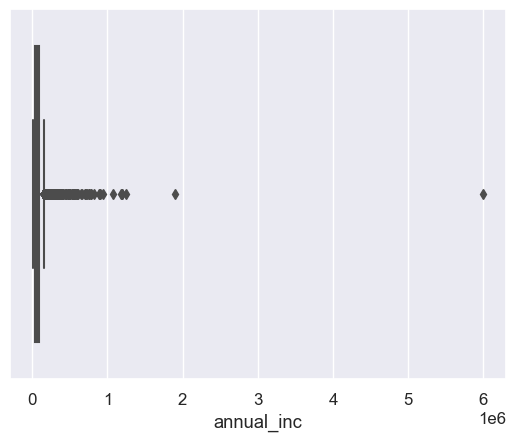

In [180]:
sns.boxplot(df['annual_inc'])
plt.show()

In [181]:
# Remove Outliers quantile .98 from Annual Income
# it will make it easier to visualize the plots.
df= df[df["annual_inc"] < df["annual_inc"].quantile(0.98)]
df['annual_inc'].describe()

count     21442.000000
mean      69503.335407
std       35904.589209
min        4800.000000
25%       43216.155000
50%       62000.000000
75%       87500.000000
max      200100.000000
Name: annual_inc, dtype: float64

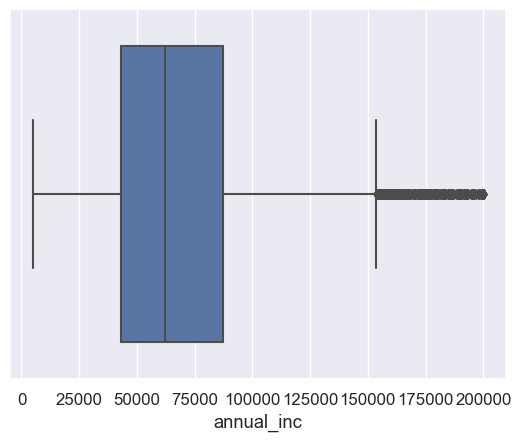

In [182]:
sns.boxplot(df['annual_inc'])
plt.show()

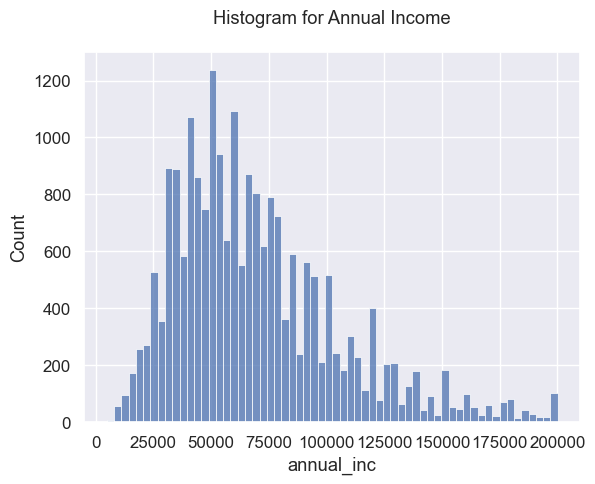

In [183]:
sns.histplot(df['annual_inc'])
plt.title("Histogram for Annual Income\n")
plt.show()
# most of the borrower's Annual incomes are in range of 40000- 80000

In [184]:
#analysing int_rate
df['int_rate'].describe()
# Average intrest rate is 12 %
# after 75% percentile interest rate increased to 24% from 15%.

count    21442.000000
mean        12.490519
std          3.894476
min          5.420000
25%          9.910000
50%         12.420000
75%         15.270000
max         24.110000
Name: int_rate, dtype: float64

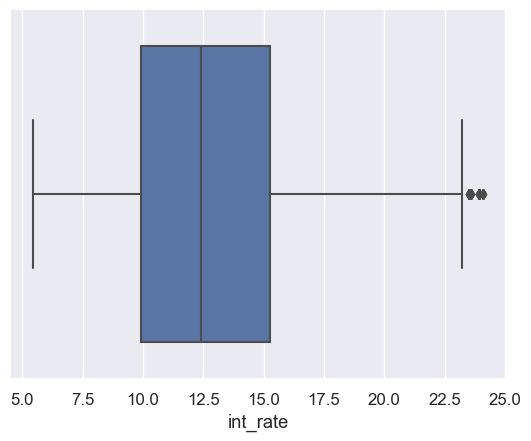

In [185]:
sns.boxplot(df['int_rate'])
plt.show()

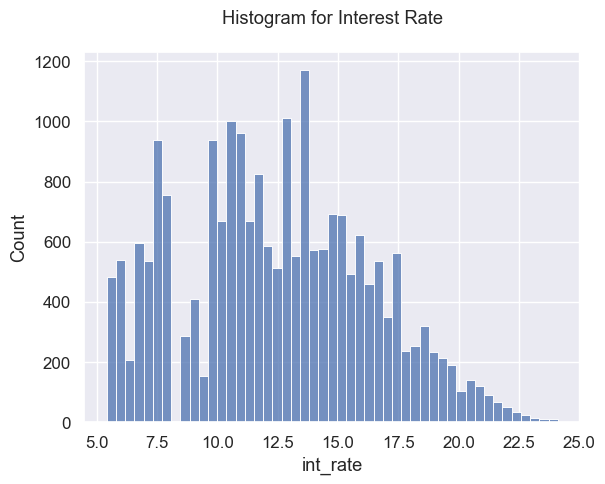

In [186]:
sns.histplot(df['int_rate'])
plt.title("Histogram for Interest Rate\n")
plt.show()
#from range of 12.5 to 13% intrest rate on loans are given at a higher rate

In [187]:
#analysing term
df['term'].value_counts()

36    14289
60     7153
Name: term, dtype: int64

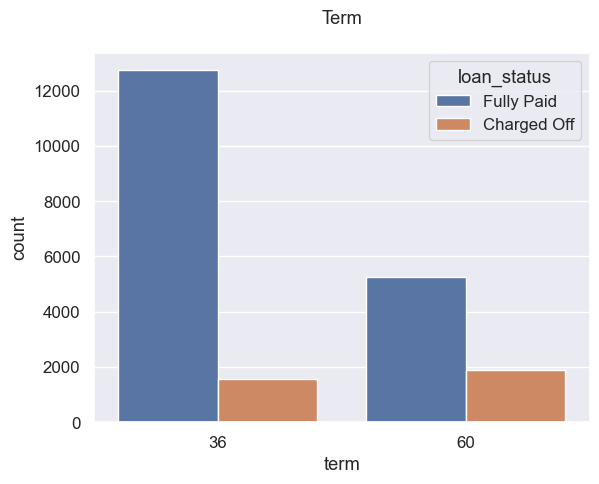

In [188]:
sns.countplot(df['term'],hue=df['loan_status'])
plt.title("Term\n")
plt.show()
#There is not much difference in charged off .

In [189]:
#analysing loan_status
df['loan_status'].value_counts()

Fully Paid     18001
Charged Off     3441
Name: loan_status, dtype: int64

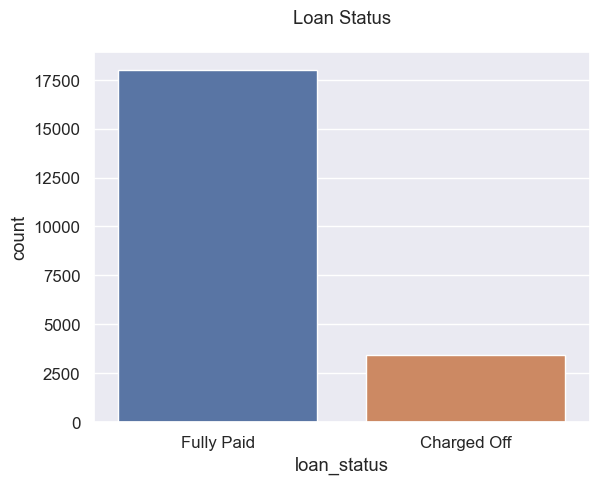

In [190]:
sns.countplot(df['loan_status'])
plt.title("Loan Status\n")
plt.show()
# Most of them are from fully paid

In [191]:
#analysing Home_Ownership
df['home_ownership'].value_counts()

RENT        10128
MORTGAGE     9784
OWN          1486
OTHER          44
Name: home_ownership, dtype: int64

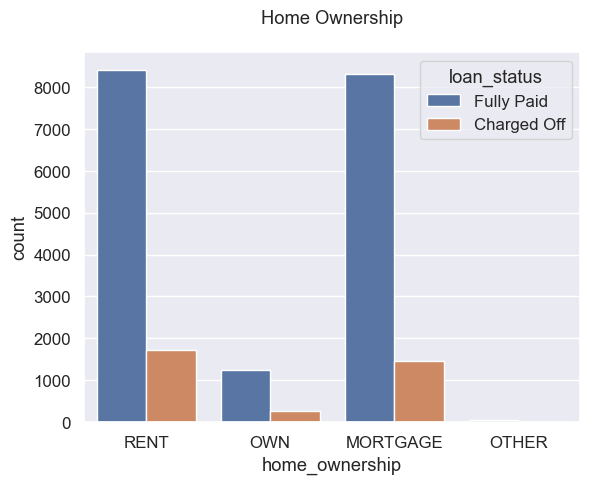

In [192]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])
plt.title("Home Ownership\n")
plt.show()
# Most of them are from RENT and MORTGAGE and Number of chraged off count also high too for these loans.

###  Data Analysis: Bivariate Analysis

In [193]:
# categorise loan amounts 
df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000+'])

# categorise annual incomes 
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

# categorise intrest rates
df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12, 16, 20], labels=['0-10', '10-12', '12-16', '16+'])
# categorise dti 
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [194]:
#Analysis on annual income against Chargedoff_Proportion
annual_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_loan['Total'] = annual_loan['Charged Off'] + annual_loan['Fully Paid'] 
annual_loan['Chargedoff_Proportion'] = annual_loan['Charged Off'] / annual_loan['Total']
annual_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
1               20000-40000          822        3244   4066   
0                   0-20000          109         440    549   
2               40000-60000         1049        4875   5924   
3               60000-80000          665        3803   4468   
4                    80000+          796        5639   6435   

loan_status  Chargedoff_Proportion  
1                         0.202164  
0                         0.198543  
2                         0.177076  
3                         0.148836  
4                         0.123699

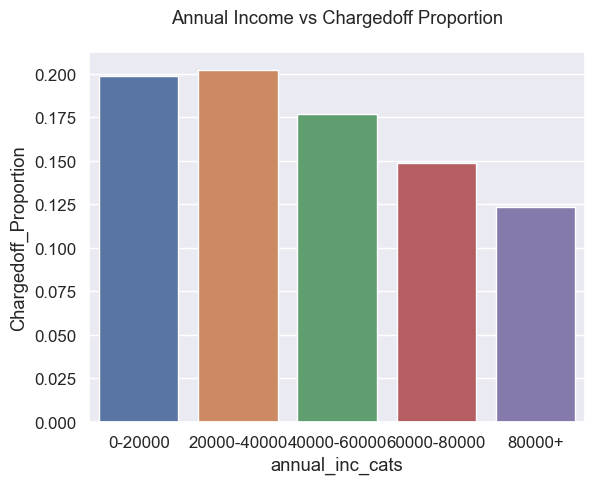

In [195]:
sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=annual_loan)
plt.title("Annual Income vs Chargedoff Proportion\n")
plt.show()
## Income range 80000+  has less chances of charged off.
# Income range 0-20000 and 20000-40000 has high chances of charged off.
# Increase in annual income charged off proportion got decreased.

In [196]:
#cont_cols means continuous column
cat_cols=['grade','sub_grade','home_ownership','purpose']

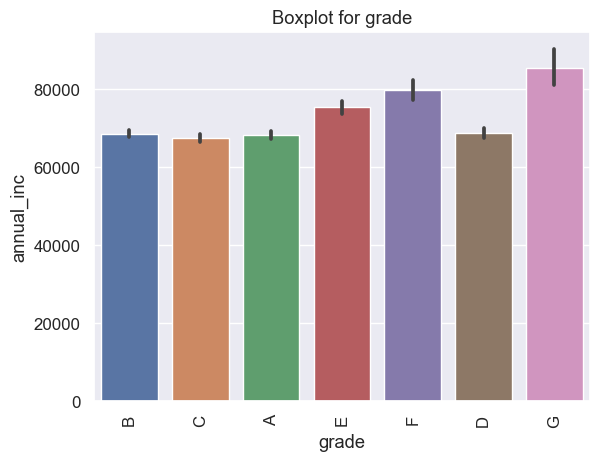

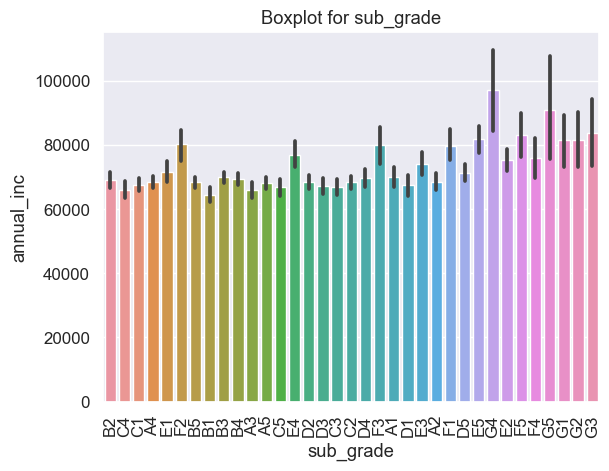

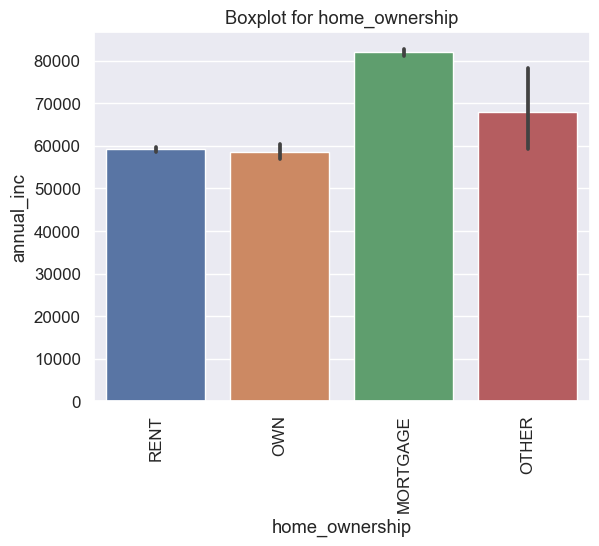

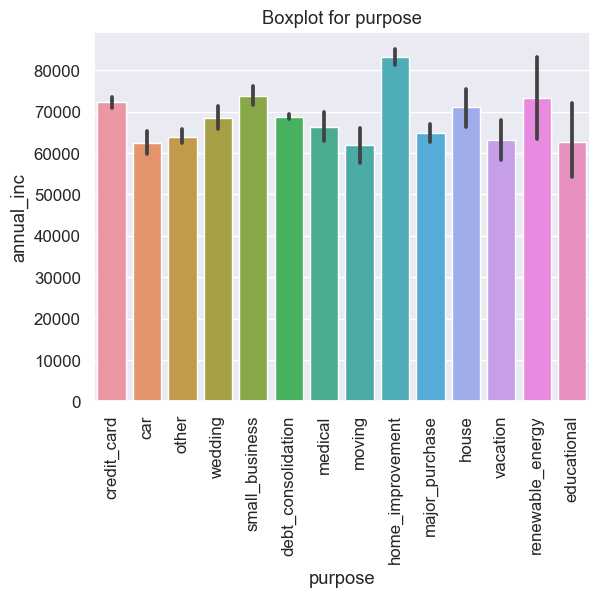

In [197]:
#comparing annual income with grade,sub_grade,home_ownership and purpose.
for i in cat_cols:
    sns.barplot(x=df[i],y=df["annual_inc"])
    plt.title("Boxplot for "+i)
    plt.xticks(rotation=90)
    plt.show()

In [198]:
#Analysis on purpose of loan against Chargedoff_Proportion
purpose_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan['Total'] = purpose_loan['Charged Off'] + purpose_loan['Fully Paid'] 
purpose_loan['Chargedoff_Proportion'] = purpose_loan['Charged Off'] / purpose_loan['Total']
purpose_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status             purpose  Charged Off  Fully Paid  Total  \
11               small_business          313         755   1068   
3                   educational           17          78     95   
8                        moving           58         275    333   
9                         other          309        1487   1796   
2            debt_consolidation         1809        8862  10671   
5                         house           34         185    219   
7                       medical           56         310    366   
10             renewable_energy            9          53     62   
12                     vacation           29         174    203   
0                           car           92         607    699   
4              home_improvement          196        1378   1574   
1                   credit_card          333        2401   2734   
13                      wedding           63         478    541   
6                major_purchase          123         958   1081   

loan_status  Chargedoff_Proportion  
11                        0.293071  
3                         0.178947  
8                         0.174174  
9                         0.172049  
2                         0.169525  
5                         0.155251  
7                         0.153005  
10                        0.145161  
12                        0.142857  
0                         0.131617  
4                         0.124524  
1                         0.121800  
13                        0.116451  
6                         0.113784

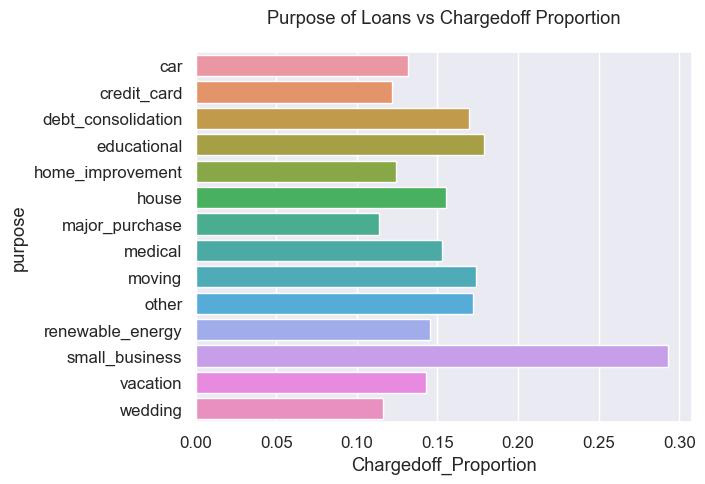

In [199]:
sns.barplot( x='Chargedoff_Proportion', y='purpose',data=purpose_loan)
plt.title("Purpose of Loans vs Chargedoff Proportion\n")
plt.show()
#small Business applicants have high chances of getting charged off.

In [200]:
#Analysis on Grade against Chargedoff_Proportion
grade_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_loan['Total'] = grade_loan['Charged Off'] + grade_loan['Fully Paid'] 
grade_loan['Chargedoff_Proportion'] = grade_loan['Charged Off'] / grade_loan['Total']
grade_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
5               F          266         516    782               0.340153
6               G           80         163    243               0.329218
4               E          552        1411   1963               0.281202
3               D          705        2403   3108               0.226834
2               C          755        3552   4307               0.175296
1               B          798        5439   6237               0.127946
0               A          285        4517   4802               0.059350

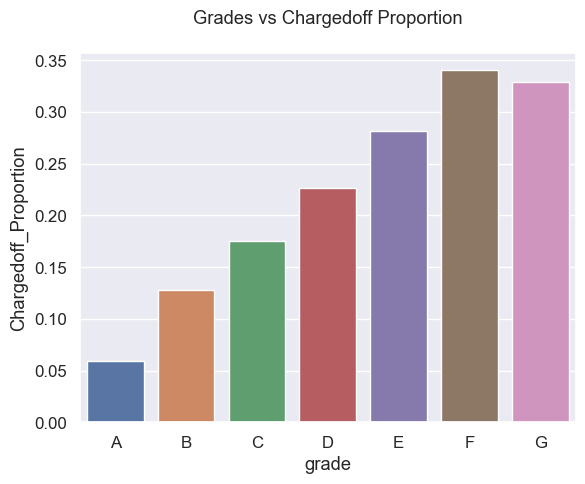

In [201]:
sns.barplot(x='grade',y='Chargedoff_Proportion', data=grade_loan)
plt.title("Grades vs Chargedoff Proportion\n")
plt.show()
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [202]:
#Analysis on Sub-Grade against Chargedoff_Proportion
grade_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_loan['Total'] = grade_loan['Charged Off'] + grade_loan['Fully Paid'] 
grade_loan['Chargedoff_Proportion'] = grade_loan['Charged Off'] / grade_loan['Total']
grade_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
29                 F5           44          50     94               0.468085
32                 G3           16          23     39               0.410256
28                 F4           46          72    118               0.389831
30                 G1           27          51     78               0.346154
31                 G2           22          43     65               0.338462
34                 G5            6          12     18               0.333333
25                 F1           75         165    240               0.312500
26                 F2           59         130    189               0.312169
27                 F3           42          99    141               0.297872
23                 E4           97         231    328               0.295732
24                 E5           87         212    299               0.290970
20                 E1          145         362    507               0.285996
21                 E2          121         313    434               0.278802
19                 D5          155         433    588               0.263605
22                 E3          102         293    395               0.258228
18                 D4          141         431    572               0.246503
17                 D3          163         512    675               0.241481
16                 D2          167         617    784               0.213010
33                 G4            9          34     43               0.209302
11                 C2          204         896   1100               0.185455
12                 C3          143         650    793               0.180328
14                 C5          108         518    626               0.172524
13                 C4          112         543    655               0.170992
10                 C1          188         945   1133               0.165931
15                 D1           79         410    489               0.161554
9                  B5          219        1266   1485               0.147475
8                  B4          186        1157   1343               0.138496
7                  B3          199        1352   1551               0.128304
6                  B2          110         866    976               0.112705
5                  B1           84         798    882               0.095238
4                  A5          105        1246   1351               0.077720
3                  A4           86        1342   1428               0.060224
2                  A3           48         766    814               0.058968
1                  A2           33         664    697               0.047346
0                  A1           13         499    512               0.025391

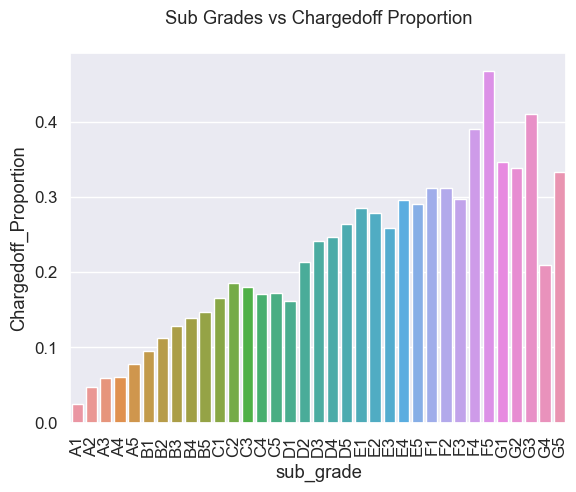

In [203]:
sns.barplot(x='sub_grade',y='Chargedoff_Proportion', data=grade_loan)
plt.title("Sub Grades vs Chargedoff Proportion\n")
plt.xticks(rotation=90)
plt.show()
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [204]:
#Analysis on Int_rate against Chargedoff_Proportion
interest_loan = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_loan['Total'] = interest_loan['Charged Off'] + interest_loan['Fully Paid'] 
interest_loan['Chargedoff_Proportion'] = interest_loan['Charged Off'] / interest_loan['Total']
interest_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status int_rate_cats  Charged Off  Fully Paid  Total  \
3                     16+          977        2515   3492   
2                   12-16         1238        5757   6995   
1                   10-12          561        3747   4308   
0                    0-10          408        5580   5988   

loan_status  Chargedoff_Proportion  
3                         0.279782  
2                         0.176984  
1                         0.130223  
0                         0.068136

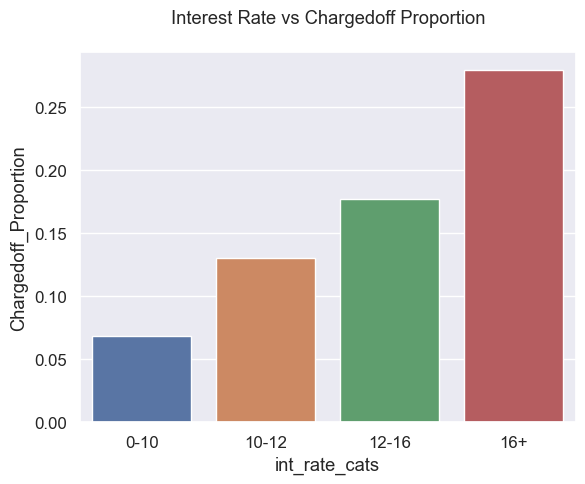

In [205]:
sns.barplot(x='int_rate_cats',y='Chargedoff_Proportion', data=interest_loan)
plt.title("Interest Rate vs Chargedoff Proportion\n")
plt.show()
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [206]:
#Analysis on emp_length against Chargedoff_Proportion
emplen_loan = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_loan['Total'] = emplen_loan['Charged Off'] + emplen_loan['Fully Paid'] 
emplen_loan['Chargedoff_Proportion'] = emplen_loan['Charged Off'] / emplen_loan['Total']
emplen_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  emp_length  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0                     0          134         477    611               0.219313
10                   10          895        4180   5075               0.176355
7                     7          163         816    979               0.166496
6                     6          196        1027   1223               0.160262
5                     5          276        1480   1756               0.157175
3                     3          337        1824   2161               0.155946
8                     8          124         679    803               0.154421
4                     4          280        1570   1850               0.151351
2                     2          332        1881   2213               0.150023
1                     1          611        3487   4098               0.149097
9                     9           93         580    673               0.138187

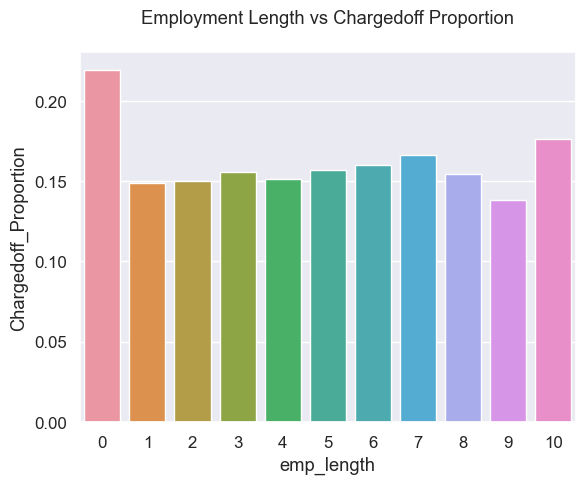

In [207]:
sns.barplot(x='emp_length',y='Chargedoff_Proportion', data=emplen_loan)
plt.title("Employment Length vs Chargedoff Proportion\n")
plt.show()
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.

In [208]:
#Analysis on verification_status against Chargedoff_Proportion
verfy_loan = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_loan['Total'] = verfy_loan['Charged Off'] +  verfy_loan['Fully Paid'] 
verfy_loan['Chargedoff_Proportion'] = verfy_loan['Charged Off'] / verfy_loan['Total']
verfy_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status verification_status  Charged Off  Fully Paid  Total  \
1                      Verified         2023        9910  11933   
0               Source Verified         1418        8091   9509   

loan_status  Chargedoff_Proportion  
1                         0.169530  
0                         0.149122

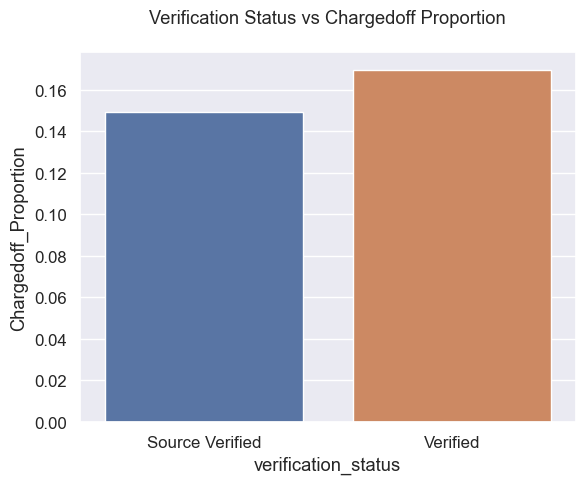

In [209]:
sns.barplot(x='verification_status',y='Chargedoff_Proportion', data=verfy_loan)
plt.title("Verification Status vs Chargedoff Proportion\n")
plt.show()
# There is not much difference in charged off proportion.

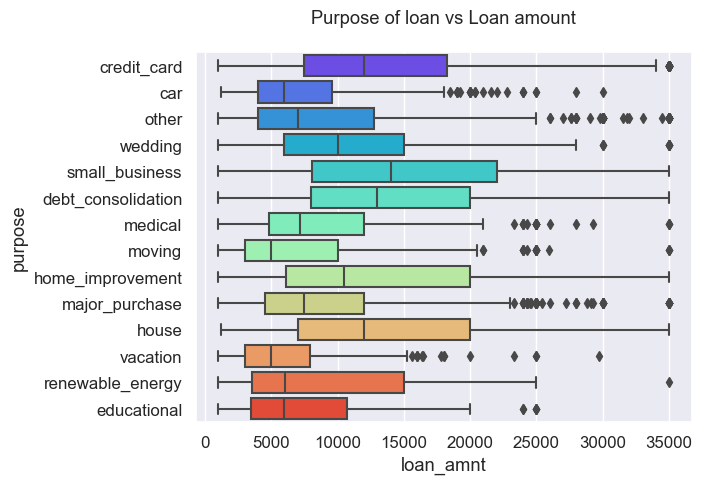

In [210]:
#Puprose of loan vs Loan amount
sns.boxplot(x='loan_amnt',y='purpose', data =df,palette='rainbow')
plt.title('Purpose of loan vs Loan amount\n')
plt.show()
#loan amount is highest for loan taken for small business.

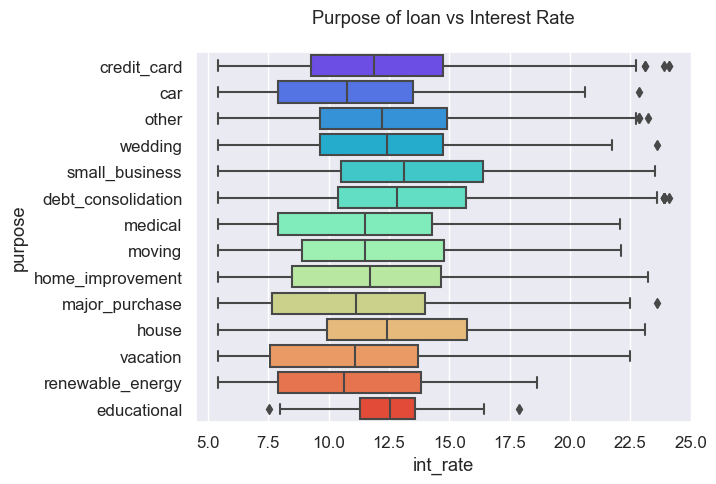

In [211]:
# Purpose vs Interest Rate
sns.boxplot(x='int_rate', y='purpose', data =df,palette='rainbow')
plt.title('Purpose of loan vs Interest Rate\n')
plt.show()
# It is clear that avearge intrest rate is highest for small business purpose.

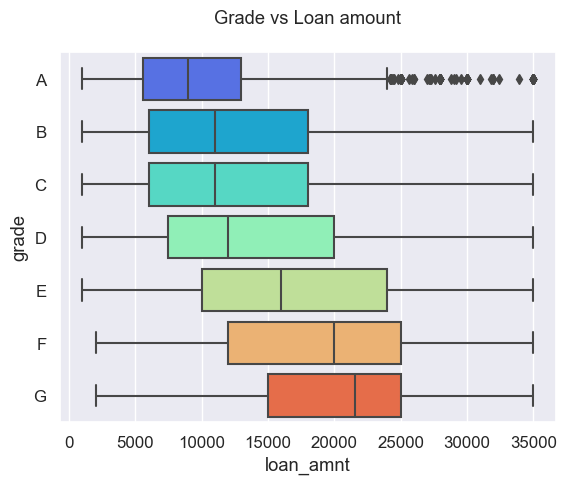

In [212]:
#compareing loan amount and grade
sns.boxplot(x='loan_amnt',y='grade', data =df,palette='rainbow',order='ABCDEFG')
plt.title('Grade vs Loan amount\n')
plt.show()
#Compare to others, G grade takes out more loans

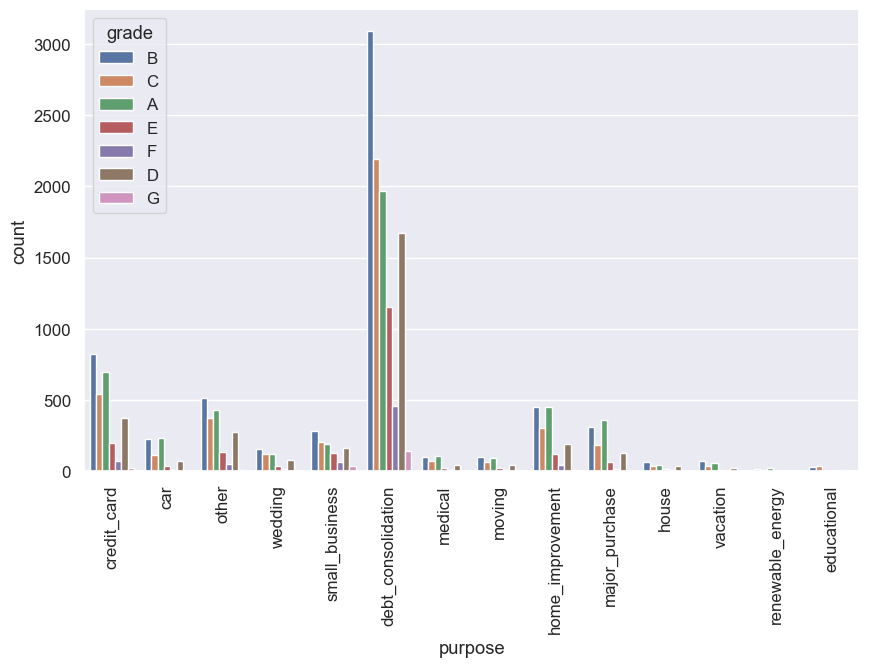

In [213]:
#comparing Grade with purpose of loan.
plt.figure(figsize=(10,6))
sns.countplot(df["purpose"],hue=df["grade"])
plt.xticks(rotation=90)
plt.show()


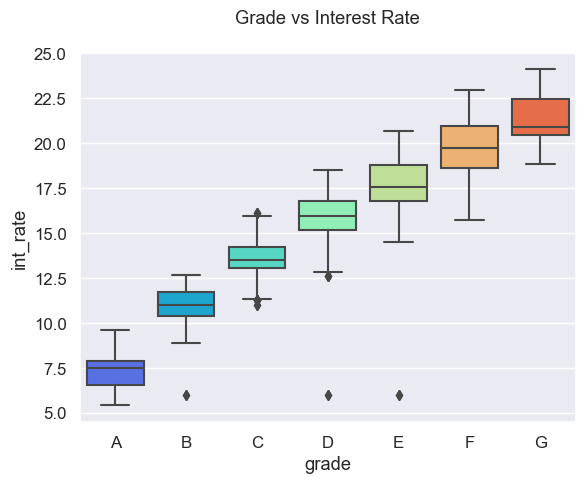

In [214]:
#Grade vs Interest Rate
sns.boxplot( x='grade',y='int_rate', data =df,palette='rainbow',order = 'ABCDEFG')
plt.title('Grade vs Interest Rate\n')
plt.show()
# A-grade is a top letter grade for a lender to assign to a borrower.
# It is clear that intrest rate is increasing with grades moving from A to G.

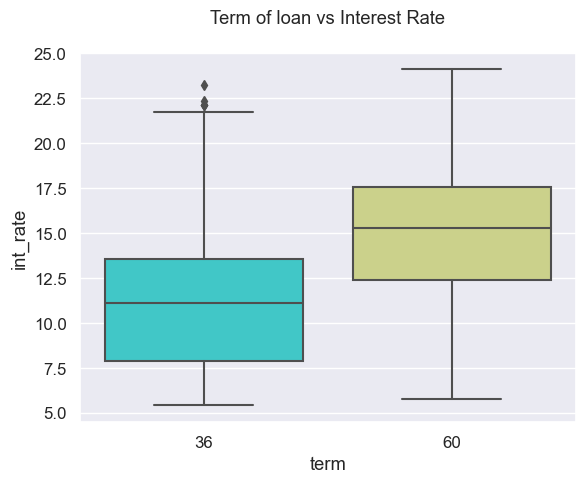

In [215]:
#compareing Term of loan vs Interest Rate.
sns.boxplot(x='term',y='int_rate',data =df,palette='rainbow')
plt.title('Term of loan vs Interest Rate\n')
plt.show()
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

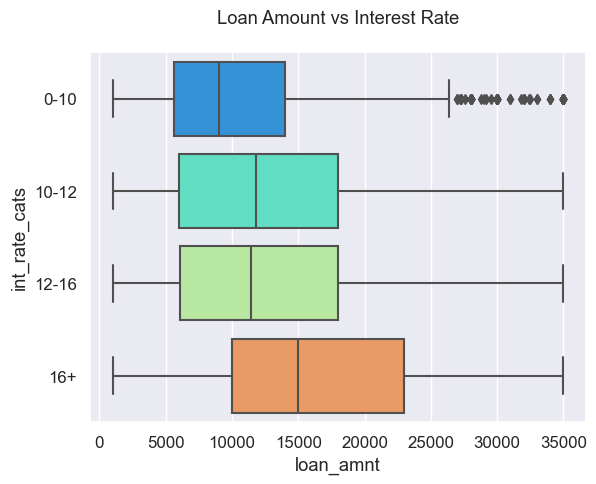

In [216]:
#Loan Amount vs Interest Rate.
sns.boxplot(x='loan_amnt',y='int_rate_cats',data =df,palette='rainbow')
plt.title('Loan Amount vs Interest Rate\n')
plt.show()
#intrest rate is increasing with loan amount increase.
#probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

In [217]:
# categorise dti into buckets for bivariate analysis.
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '25+'])

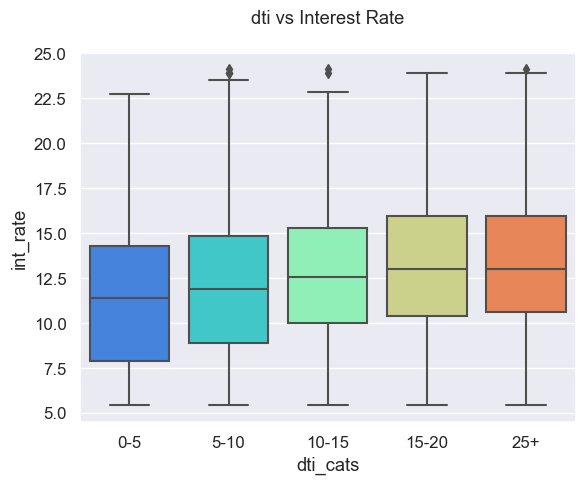

In [218]:
# dti vs Interest Rate
sns.boxplot(x='dti_cats',y='int_rate',data =df,palette='rainbow')
plt.title('dti vs Interest Rate\n')
plt.show()
#If your DTI is low then its enough you may get a lower interest rate.

### Multivariate Analysis 

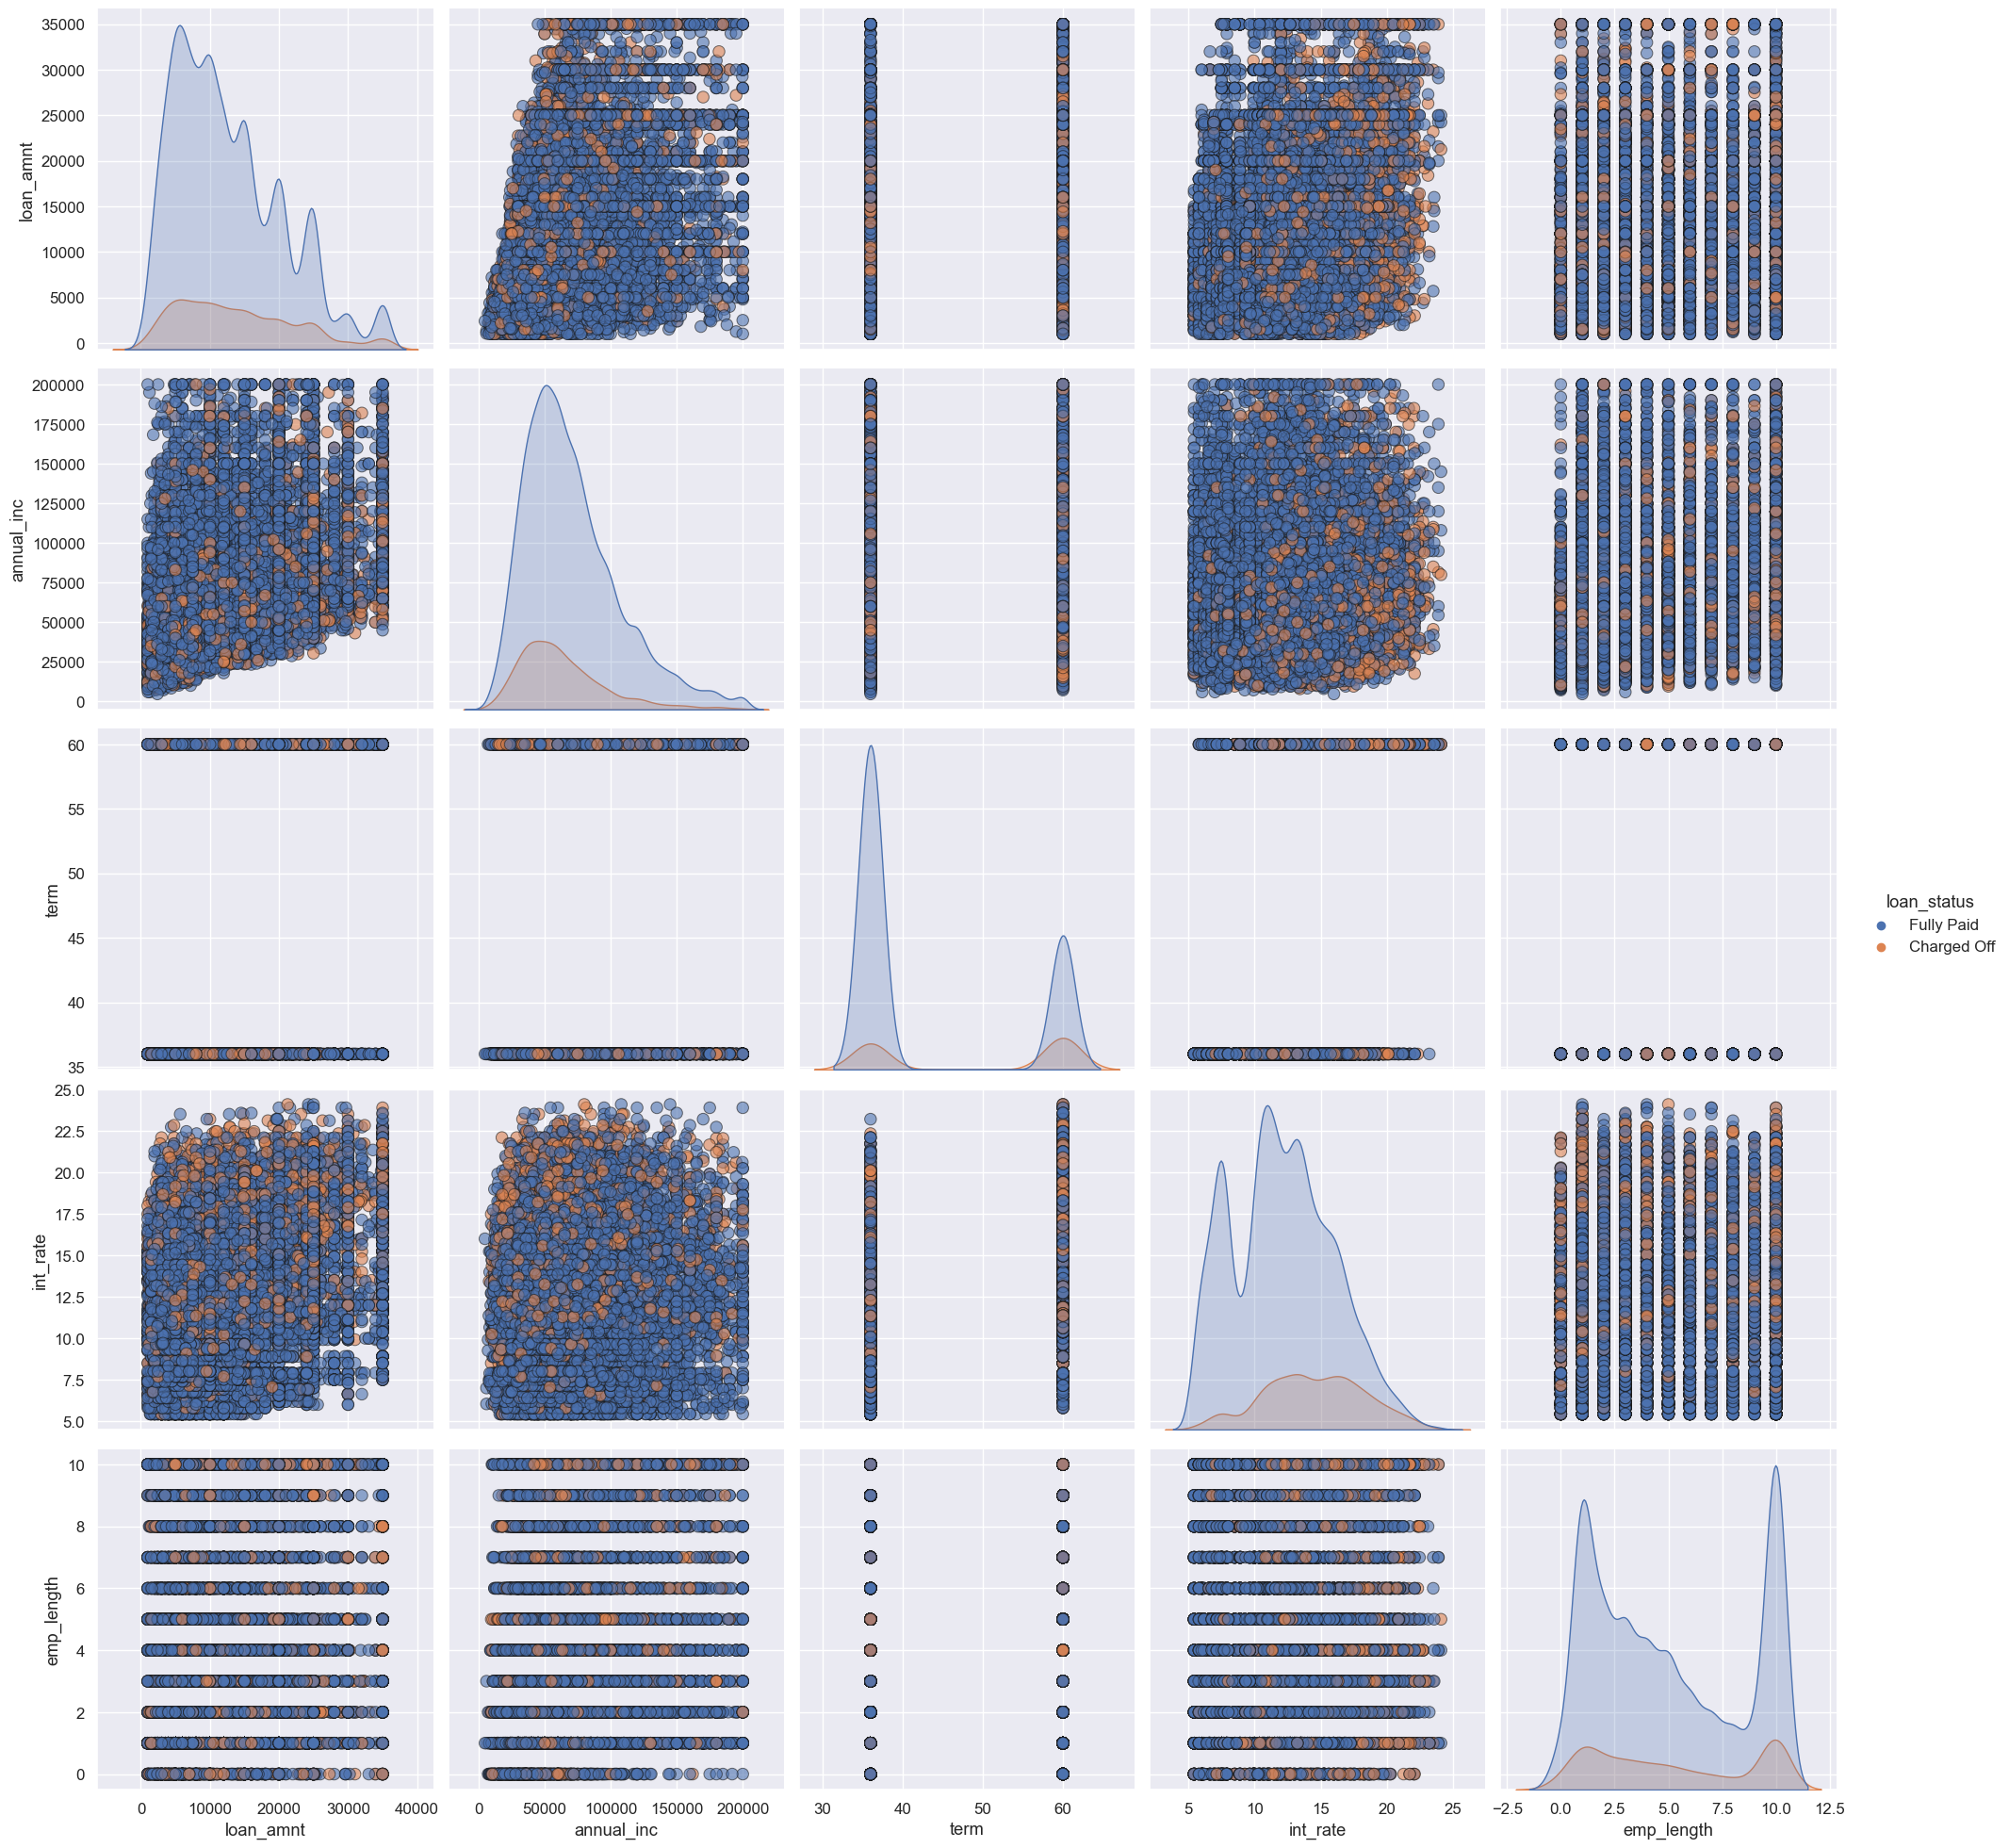

In [219]:
#Pairplot
n = df[['loan_amnt', 'annual_inc','term','int_rate','emp_length','loan_status']].copy()
sns.pairplot(n, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()
# Higher the annual income higher the loan amount slightly.
# Intrest rate is increasing with loan amount increase this results in high charged off. 

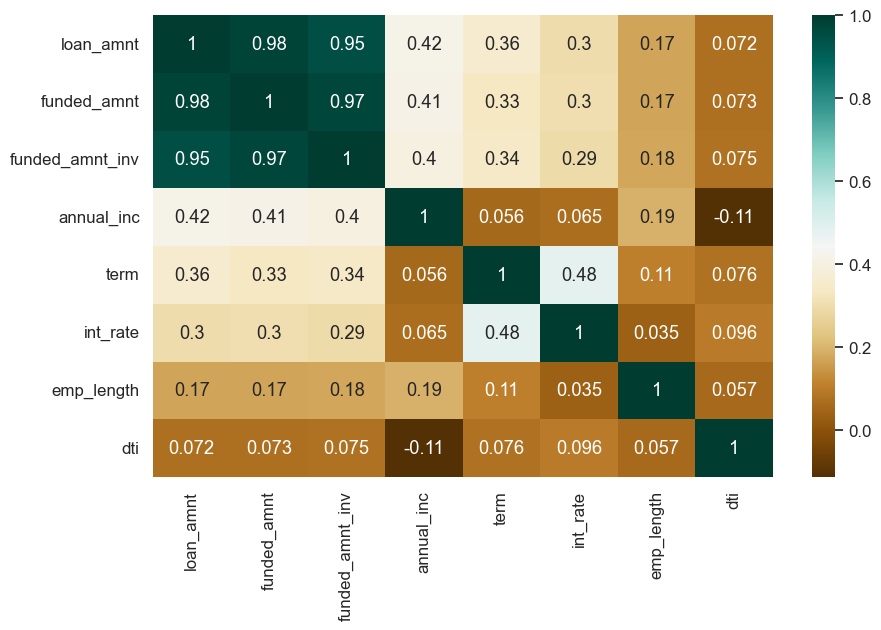

In [220]:
#Analysis by Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['loan_amnt','funded_amnt','funded_amnt_inv', 'annual_inc','term','int_rate','emp_length','loan_status','dti']].corr(),annot=True,cmap="BrBG")
sns.set(font_scale=1.1)
plt.show()
# The Loan amount, investor amount, funding amount are strongly correlated.
#annual income is low DTI is high 

### 4. Recommendations

# LOAN

- Higher the annual income higher the loan amount slightly.
- Most of the Loan amounts are in range of 5000 - 15000
- Most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
- Loan taken for small business purpose, Debt consolidation and Credit card are more as compare to loan taken for other purposes.
- Most of the Loan borrower's Annual incomes are in range of 40000- 80000
- Most of them living in rented home or mortgazed their home.
- Most of the loans issued for longer term
- Probably when loan amount is more it is taken for longer loan term, as we know that longer the loan term more the interest rate.
- Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.

# INTEREST

- The intrest rate is increasing with loan amount increase.
- from range of 12.5 to 13% intrest rate on loans are given at a higher rate
- The avearge intrest rate is higher for 60 months loan term.
- The avearge intrest rate is highest for small business purpose.
- Debt consolidation is 2nd where borrowers had to pay more interest rate.

# CHARGED-OFF

- Income range 80000+  has less chances of charged off.
- Income range 0-20000 and 20000-40000 has high chances of charged off.
- Most of them are from RENT and MORTGAGE and Number of chraged off count also high too for these loans.
- Increase in annual income charged off proportion got decreased.
- Small Business applicants have high chnaces of getting charged off.
- Renewable_energy where chanrged off proportion is better as compare to other categories.
- Grade "A" has very less chances of charged off.
- Chances of charged off is increasing with grade moving from "A" towards "G"
- proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"
- Charged off proportion is increasing with higher intrest rates.
- Those who are not working or have less than 1 year of work experience have high chances of getting charged off.

# GRADE

- A-grade is a top letter grade for a lender to assign to a borrower.
- The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
- The intrest rate is increasing with grades moving from A to F.

# DTI
- If your DTI is low then its enough you may get a lower interest rate.